# Adattisztítás és integráció

A valós adathalmazok gyakran zajosak, hiányosak, avagy éppen redundáns információt vagy duplikátum egyedeket tartalmaznak. Ezért a tudásfeltárás folyamatában az adattisztítás és adatintegrálással kezdődik.

Az adattisztítás szerepe javítani az adatok minőségén azáltal, hogy kiszűri és eltávolítja az adatokban fellépő hibákat és inkonzisztenciákat.

Az [adattisztítás](https://hu.wikipedia.org/wiki/Adattiszt%C3%ADtás) során:
"
- felmérjük a hibákat
	- ellenőrizzük az adatfájl szerkezeti épségét
	- a zajt, felesleges információt tartalmazó mezőket javítjuk
	- felmérjük a hiányzó értékeket és amennyiben lehet ezeket pótoljuk
	- felmérjük az adatközlési és adatbeviteli hibákat
		- megvizsgáljuk az egyes változók eloszlását
			- az eloszlások szélein elhelyezkedő extrém értékeket ellenőrizzük
			- felmérjük, hogy az eloszlások megfelelnek-e az előzetes elvárásainknak, vannak-e nem várt sűrűsödések, ritkulások egyes értéktartományokban (például durva kerekítés vagy eltérő mértékegység használata az adatszolgáltatók egy részénél)
		-  megvizsgáljuk, hogy a változók közötti triviális összefüggések teljesülnek-e
-  a hibásnak tűnő adatokat felülvizsgáljuk, javítjuk 
".


# Feladatok

1. Az `egyetemek.txt` fájlból szűrjük ki az államokat és azon belül a városokat, melyben egyetemek találhatóak. Ha vannak duplikátumok, helytelen adatok (pl. számokat tartalmazó államnév), ezeket javítsuk. Vizsgáljuk meg az egyetemek eloszlását államok szerint. Melyik államban van a legtöbb, legkevesebb egyetem?

2. Bővítsük ki az adatbázisunkat egy oszloppal, mely tartalmazza az államok rövidítését is (pl. Texas - TX, California - CA stb.).  [Forrás](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations).

3. Az adatbázist integráljuk a [List of states and territories of the United States by population](https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States_by_population) linken szereplő népszámlálási adatokkal és számoljuk ki államonként hány főre jut egy egyetemi város.

4. Hasonlóan, a [List of U.S. states and territories by area](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area) linken szereplő területi adatok integrálásával, számoljuk ki államonként átlagban hány négyzetkilométerre jut egy egyetemi város.

5. A [példa](https://datasciencechalktalk.com/2019/09/28/analyzing-u-s-exports-with-plotly/), a kivitelt, exportmennyiséget ábrázolja az Amerikai Egyesült Államok térképen, államonként lebontva ezt. Készítsünk hasonló ábrákat az egyetemek abszolút, lakoság és terület szerinti eloszlásáról is. Az ábrákat exportáljuk kép formájában.
![](https://i.ibb.co/s1zdnLY/mapplot.png)

  Ábra 1. [Térképen való ábrázolás](https://plotly.com/python/maps/) Plotly segítségével. [Forrás](https://datasciencechalktalk.com/2019/09/28/analyzing-u-s-exports-with-plotly/).

6. Számoljuk ki, hány egyetem van városonként, majd összesítve államonként. Ehhez az `egyetemek.txt` fájlban miután megkapunk egy várost, az utána következő kerek zárójelek között megszámoljuk, hány vesszővel elválasztott karakterlánc található. 
Pl. a következő sorban:	`Claremont (Claremont McKenna College, Pomona College, Harvey Mudd College, Scripps College, Pitzer College, Keck Graduate Institute, Claremont Graduate University)[5]` -> 6 vessző van a kerek zárójelek között, tehát 7 egyetem van a városban.    
Melyik államban és melyik városban van a legtöbb egyetem?


1. Feladat


In [17]:
# cleaning
import pandas as pd  # konvenció szerint pd aliast használunk
%matplotlib inline
import matplotlib
import numpy as np

# tegyük szebbé a grafikonokat
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (15, 3)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'

def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)


path = '/content/egyetemek.txt'
file = open("/content/egyetemek.txt", "r")

states = np.array([])

df = pd.DataFrame(columns=('State', 'City', 'University'))

state = ''
city = ''
university = ''

with open('egyetemek.txt') as file:
  for line in file:

    # if a new state discovered
    if '[edit]' in line:
      if  hasNumbers(line) == False:
        state = line.replace('[edit]\n', '')
        states = np.append(states,state)
    else:
      #these lines containing  the cities and the universities
      if  '('  in line:    
        #split universities from cities   
        temp = line.split('(',1)
        city = temp[0]
        universities = temp[1]
        if hasNumbers(city) == False:
          #cut the last unnecessary charcters
          universities = universities.split(')')
          universities = universities[0]

          #separate into a list the universities
          universities = universities.split(',')
        
          # traverse through the universities lsit and append a new row into df
          for u in universities:
            row = {'State':state,'City':city,'University':u}
            df = df.append(row, ignore_index=True)


##deleting duplicates
df.drop_duplicates(inplace = True)
df



,State,City,University
0,Alabama,Auburn,Auburn University
1,Alabama,Florence,University of North Alabama
2,Alabama,Jacksonville,Jacksonville State University
3,Alabama,Livingston,University of West Alabama
4,Alabama,Montevallo,University of Montevallo
...,...,...,...
724,Wisconsin,River Falls,University of Wisconsin–River Falls
725,Wisconsin,Stevens Point,University of Wisconsin–Stevens Point
726,Wisconsin,Waukesha,Carroll University
727,Wisconsin,Whitewater,University of Wisconsin–Whitewater


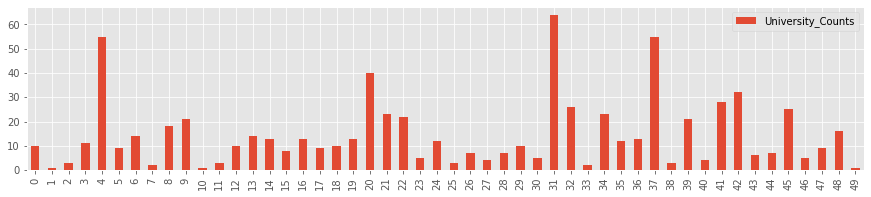

In [18]:
state = df.groupby(df['State']).size().reset_index(name="University_Counts")
state.plot(kind = 'bar')

In [19]:
state[state.University_Counts ==  state.University_Counts.min()]


,State,University_Counts
1,Alaska,1
10,Hawaii,1
49,Wyoming,1


In [20]:
state[state.University_Counts ==  state.University_Counts.max()]

,State,University_Counts
31,New York,64


2. Feladat

In [22]:
# a dictionary with the abbreviation
us_state_abbrev = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

df['State_abb'] = df['State'].map(us_state_abbrev).fillna(df['State'])

df.head()

,State,City,University,State_abb
0,Alabama,Auburn,Auburn University,AL
1,Alabama,Florence,University of North Alabama,AL
2,Alabama,Jacksonville,Jacksonville State University,AL
3,Alabama,Livingston,University of West Alabama,AL
4,Alabama,Montevallo,University of Montevallo,AL


3. Feladat

In [23]:
state_population = {"Alabama":4903185,"Alaska":731545,"Arizona":7278717,"Arkansas":3017825,"California":39512223,"Colorado":5758736,"Connecticut":3565287,
            "Delaware":973764,"Florida":21477737,"Georgia":10617423,"Hawaii":1415872,"Idaho":1787065,"Illinois":12671821,"Indiana":6732219,"Iowa":3155070,
            "Kansas":2913314,"Kentucky":4467673,"Louisiana":4648794,"Maine":1344212,"Maryland":6045680,"Massachusetts":6949503,"Michigan":9986857,
            "Minnesota":5639632,"Mississippi":2976149,"Missouri":6137428,"Montana":1068778,"Nebraska":1934408,"Nevada":3080156,"New Hampshire":1359711,
            "New Jersey":8882190,"New Mexico":2096829,"New York":19453561,"North Carolina":10488084,"North Dakota":762062,"Ohio":11689100,"Oklahoma":3956971,
            "Oregon":4217737,"Pennsylvania":12801989,"Rhode Island":1059361,"South Carolina":5148714,"South Dakota":884659,"Tennessee":6833174,"Texas":28995881,
            "Utah":3205958,"Vermont":623989,"Virginia":8535519,"Washington":7614893,"West Virginia":1792147,"Wisconsin":5822434,"Wyoming":578759}

df['Population'] = df['State'].map(state_population)
population = df.groupby(['State', 'State_abb','Population']).size().reset_index(name='University_Counts')
population['University/Citizen'] = round(population.Population/population.University_Counts,1)
population.head()

,State,State_abb,Population,University_Counts,University/Citizen
0,Alabama,AL,4903185,10,490318.5
1,Alaska,AK,731545,1,731545.0
2,Arizona,AZ,7278717,3,2426239.0
3,Arkansas,AR,3017825,11,274347.7
4,California,CA,39512223,55,718404.1


4.Feladat

In [36]:
allamter = {"Alabama":135767,"Alaska":135767,"Arizona":295234,"Arkansas":137732,"California":423967,"Colorado":269601,"Connecticut":14357,"Delaware":6446,
            "Florida":170312,"Georgia":153910,"Hawaii":28313,"Idaho":216443,"Illinois":149995,"Indiana":94326,"Iowa":145746,"Kansas":213100,"Kentucky":104656,
            "Louisiana":135659,"Maine":91633,"Maryland":32131,"Massachusetts":27336,"Michigan":250487,"Minnesota":225163,"Mississippi":125438,"Missouri":180540,
            "Montana":380831,"Nebraska":200330,"Nevada":286380,"New Hampshire":24214,"New Jersey":22591,"New Mexico":314917,"New York":141297,"North Carolina":139391,
            "North Dakota":183108,"Ohio":116098,"Oklahoma":181037,"Oregon":254799,"Pennsylvania":119280,"Rhode Island":4001,"South Carolina":82933,"South Dakota":199729,
            "Tennessee":109153,"Texas":695662,"Utah":219882,"Vermont":24906,"Virginia":110787,"Washington":184661,"West Virginia":62756,"Wisconsin":169635,"Wyoming":253335}
df['Area'] = df['State'].map(allamter)

area = df.groupby(["State","State_abb","Population","Area"]).size().reset_index(name="Counts")
area["Capita"] = round((area.Population/area.Counts),2)
area["Capita/km2"] = round((area.Area/area.Counts),2)
area

,State,State_abb,Population,Area,Counts,Capita,Capita/km2
0,Alabama,AL,4903185,135767,10,490318.50,13576.70
1,Alaska,AK,731545,135767,1,731545.00,135767.00
2,Arizona,AZ,7278717,295234,3,2426239.00,98411.33
3,Arkansas,AR,3017825,137732,11,274347.73,12521.09
4,California,CA,39512223,423967,55,718404.05,7708.49
5,Colorado,CO,5758736,269601,9,639859.56,29955.67
6,Connecticut,CT,3565287,14357,14,254663.36,1025.50
7,Delaware,DE,973764,6446,2,486882.00,3223.00
8,Florida,FL,21477737,170312,18,1193207.61,9461.78
9,Georgia,GA,10617423,153910,21,505591.57,7329.05


5.Feladat

In [37]:
import plotly.graph_objects as go
df1 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

fig = go.Figure(data=go.Choropleth(
    locations =df1['code'],
    z = state['University_Counts'].astype(float),
    locationmode ='USA-states',
    colorscale = 'Blues',
    colorbar_title = 'Universities',
))

fig.update_layout(
    title_text = 'Egyetemek szama allamonkent',
    geo_scope = 'usa',
)
fig.show()

In [42]:
fig = go.Figure(data=go.Choropleth(
    locations=df1['code'],
    z = area["Capita/km2"].astype(float),
    locationmode = "USA-states",
    colorscale = "Blues",
    colorbar_title = "Hany km2 -re",
))
fig.update_layout(
    title_text = "Allamonkent hany negyzetkilometerre jut egy egyetem",
    geo_scope="usa",
)
fig.show()

In [43]:
fig = go.Figure(data=go.Choropleth(
    locations=df1['code'],
    z = area["Capita"].astype(float),
    locationmode = "USA-states",
    colorscale = "Blues",
    colorbar_title = "Hany fore",
))
fig.update_layout(
    title_text = "Allamonkent hany fore jut egy egyetem",
    geo_scope="usa",
)
fig.show()